In [1]:
import AgarwalDuduikWu as ADW

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import softmax
import collections
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
import xgboost as xgb

from FairReg import FairReg
from evaluation import get_stats, get_risk_unf_wrt_eps, compare_with_ADW
from evaluation_measures import DP_unfairness, prob_unfairness, prob_unfairness_summary, DP_unfairness_summary
from plots import plot_distributions_compare, plot_predictions_compare, plot_distributions, plot_predictions, plot_risk_history,plot_unfairness_history,plot_unfairness_vs_risk, plot_risk_unf_compare, plot_risk_unf_wrt_eps
from data_prep import get_lawschool_data, get_communities_data, get_frequencies

import time

# Communities and Crime

In [2]:
num=3
T=3000

eps_list = []
for i in range (4,9):
    eps_list+=[[5**(-i), 5**(-i)]]

results = compare_with_ADW(dataset='communities', 
            num=num, T=T, eps_list=eps_list, print_details = True, beta='auto', L='auto',
            TRAIN_SIZE=0.4, UNLAB_SIZE=0.4, TEST_SIZE=0.2)

1 / 5  : collecting statistics for eps=[0.0016, 0.0016]
-----    1 / 3 : Our method: training completed; training time:  0.23316669464111328
-----    1 / 3 : ADW: training completed; training time:  584.0104594230652
-----    2 / 3 : Our method: training completed; training time:  0.24430012702941895
-----    2 / 3 : ADW: training completed; training time:  424.50834250450134
-----    3 / 3 : Our method: training completed; training time:  0.29262661933898926
-----    3 / 3 : ADW: training completed; training time:  1118.6847949028015
---------------------------------------------------------
2 / 5  : collecting statistics for eps=[0.00032, 0.00032]
-----    1 / 3 : Our method: training completed; training time:  0.2992720603942871
-----    1 / 3 : ADW: training completed; training time:  660.3063607215881
-----    2 / 3 : Our method: training completed; training time:  0.23127293586730957
-----    2 / 3 : ADW: training completed; training time:  448.5400240421295
-----    3 / 3 : Our m

In [3]:
results

{'base_mse_risk': 0.021805106106686862,
 'base_DP': {0: 0.4962330035961089, 1: 0.13168132231253712},
 'prob_risk': [0.09454784000034473,
  0.09543389153168423,
  0.09555870870210714,
  0.0957785007758999,
  0.09555958811280085],
 'mse_risk': [0.023773364131304858,
  0.024525138700288746,
  0.024897616785240006,
  0.0250004801673272,
  0.024856971294770224],
 'avg_unf': {0: [0.004071932793308741,
   0.0037841335122975645,
   0.00373995057521075,
   0.003680408483525016,
   0.003731550156158622],
  1: [0.001092787075520557,
   0.0010155502077731488,
   0.001003692806126846,
   0.0009877134588373848,
   0.0010014383805665307]},
 'sum_unf': {0: [1.3315220234119582,
   1.2374116585213035,
   1.2229638380939152,
   1.20349357411268,
   1.2202169010638693],
  1: [0.35734137369522206,
   0.3320849179418197,
   0.3282075476034787,
   0.32298230103982484,
   0.32747035044525563]},
 'DP_unf': {0: [0.457198832513694,
   0.3722562072688018,
   0.4129383071448563,
   0.3589520610931191,
   0.3597417

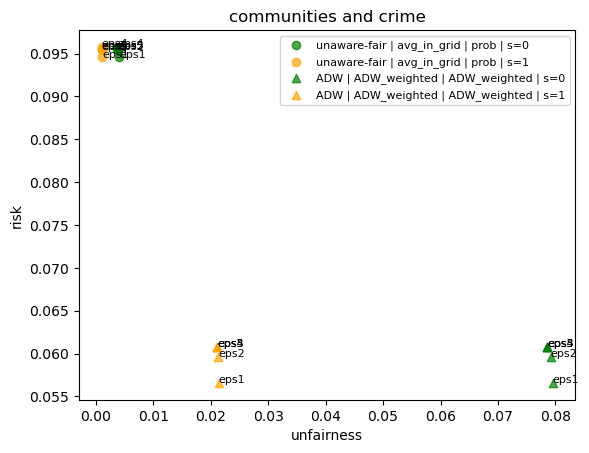

In [4]:
pairs_list = [[results['avg_unf'], results['prob_risk']],
              [results['ADW_unf'], results['ADW_risk']]]
model_list = ['unaware-fair','ADW']
unf_type_list = ['avg_in_grid','ADW_weighted']
risk_type_list = ['prob','ADW_weighted']
markers_list = ['o','^']

plot_risk_unf_compare(pairs_list=pairs_list, model_list=model_list, unf_type_list=unf_type_list, risk_type_list=risk_type_list, 
                      markers_list=markers_list, dataset='communities and crime',
                      x_label = 'unfairness', y_label = 'risk',
                      K=2, colors = ['g', 'orange'], alpha=0.7, annotate = True)

Training time

In [5]:
print('The average training time of our method is ',np.mean(results['training_time_hist']),'with std of ', np.std(results['training_time_hist']))

The average training time of our method is  0.26923449834187824 with std of  0.026722147458192742


In [6]:
print('The average training time of ADW method is ',np.mean(results['ADW_training_time_hist']),'with std of ', np.std(results['ADW_training_time_hist']))

The average training time of ADW method is  735.556244468689 with std of  327.52403210635674


In [7]:
print('On average, our method is ',np.mean(results['ADW_training_time_hist'])/np.mean(results['training_time_hist']), ' times faster than the ADW method')

On average, our method is  2732.0282096043575  times faster than the ADW method


# Law School

In [8]:
num=3
T=3000

eps_list = []
for i in range (4,9):
    eps_list+=[[5**(-i), 5**(-i)]]

results_law = compare_with_ADW(dataset='lawschool', 
            num=num, T=T, eps_list=eps_list, print_details = True, beta='auto', L='auto',
            TRAIN_SIZE=0.4, UNLAB_SIZE=0.4, TEST_SIZE=0.2)

1 / 5  : collecting statistics for eps=[0.0016, 0.0016]
-----    1 / 3 : Our method: training completed; training time:  0.24400949478149414
-----    1 / 3 : ADW: training completed; training time:  498.0410554409027
-----    2 / 3 : Our method: training completed; training time:  0.3038156032562256
-----    2 / 3 : ADW: training completed; training time:  414.3711476325989
-----    3 / 3 : Our method: training completed; training time:  0.2672271728515625
-----    3 / 3 : ADW: training completed; training time:  457.38985443115234
---------------------------------------------------------
2 / 5  : collecting statistics for eps=[0.00032, 0.00032]
-----    1 / 3 : Our method: training completed; training time:  0.2643601894378662
-----    1 / 3 : ADW: training completed; training time:  488.98922061920166
-----    2 / 3 : Our method: training completed; training time:  0.29204583168029785
-----    2 / 3 : ADW: training completed; training time:  411.04421854019165
-----    3 / 3 : Our me

In [9]:
results_law

{'base_mse_risk': 0.010818580849267264,
 'base_DP': {0: 0.2691666666666666, 1: 0.04937376725838267},
 'prob_risk': [0.0634388088124116,
  0.06345881823560978,
  0.0634340681966163,
  0.06343751928375867,
  0.0634864890588199],
 'mse_risk': [0.01068509587905807,
  0.010682180927069046,
  0.01070498613968907,
  0.01071241640946502,
  0.010687296382030179],
 'avg_unf': {0: [0.000565745173338274,
   0.0005221774055392728,
   0.0005509972512964654,
   0.0004643186276971026,
   0.0004989836355973641],
  1: [0.00010377574185494908,
   9.57840211344231e-05,
   0.00010107050171710327,
   8.517087253615457e-05,
   9.152954262436825e-05]},
 'sum_unf': {0: [0.18499867168161557,
   0.17075201161134226,
   0.18017610117394417,
   0.15183219125695252,
   0.16316764884033808],
  1: [0.03393466758656835,
   0.03132137491095635,
   0.033050054061492765,
   0.027850875319322545,
   0.029930160438168412]},
 'DP_unf': {0: [0.18301075268817205,
   0.17720430107526877,
   0.17884408602150534,
   0.1734946236

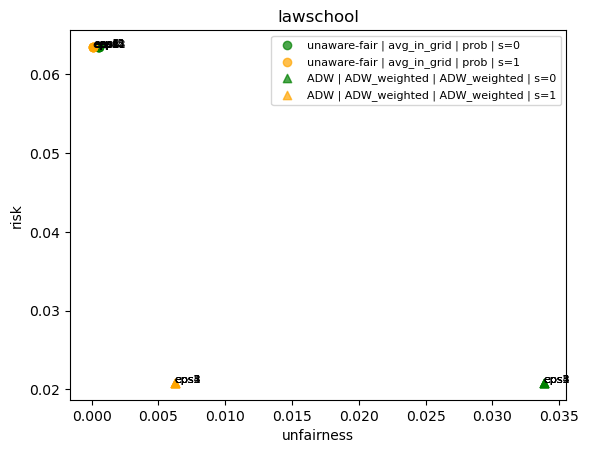

In [10]:
pairs_list = [[results_law['avg_unf'], results_law['prob_risk']],
              [results_law['ADW_unf'], results_law['ADW_risk']]]
model_list = ['unaware-fair','ADW']
unf_type_list = ['avg_in_grid','ADW_weighted']
risk_type_list = ['prob','ADW_weighted']
markers_list = ['o','^']

plot_risk_unf_compare(pairs_list=pairs_list, model_list=model_list, unf_type_list=unf_type_list, risk_type_list=risk_type_list, 
                      markers_list=markers_list, dataset='lawschool',
                      x_label = 'unfairness', y_label = 'risk',
                      K=2, colors = ['g', 'orange'], alpha=0.7, annotate = True)

Training time

In [11]:
print('The average training time of our method is ',np.mean(results_law['training_time_hist']),'with std of ', np.std(results_law['training_time_hist']))

The average training time of our method is  0.27383273442586265 with std of  0.018981870488398674


In [12]:
print('The average training time of ADW method is ',np.mean(results_law['ADW_training_time_hist']),'with std of ', np.std(results_law['ADW_training_time_hist']))

The average training time of ADW method is  452.6525585015615 with std of  33.37667948378871


In [13]:
print('On average, our method is ',np.mean(results_law['ADW_training_time_hist'])/np.mean(results_law['training_time_hist']), ' times faster than the ADW method')

On average, our method is  1653.025740149823  times faster than the ADW method
